# Census Data Exploration: Age distribution in the City of Los Angeles
This notebook explores Census Data in Los Angeles, using the Age by Sex variable, downloaded in .geojson format from Census Reporter. This data is from the 2015-2019 5-year American Community Survey. This data will be useful for our project because it will allow us to investigate if age has on impact on where collisions, injuries, and fatalities take place. For example, do neighborhoods with a greater proportion of children or elderly people have more collision hot spots? Is this something we could preemptively design for when designing our roads and streets? Hopefully we'll find out!

*Notebook Author: Ellie Gertler* (this notebook has been cleaned up for the midterm assignment)

## Importing Data 

**Step 1:** First I will Import the spatial data libraries that I will eventually use to create charts, graphs, and maps in this notebook.

In [1]:
import pandas as pd 
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

**Step 2:** Next I will import the 5-year ACS data in .geojson format that I will use for this notebook.

In [2]:
gdf = gpd.read_file('Data/acs2019_5yr_B01001_14000US06037293306.geojson')

## Initial Data Exploration

**Step 1:** In the next few cells, I will do a preliminary general exploration of my data set to see what I am working with. This will allow me to see if there is any clean up that needs to be done, if I need to drop any rows, etc. 

<AxesSubplot:>

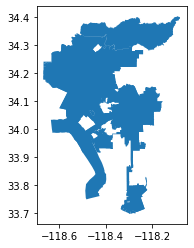

In [3]:
gdf.plot() # Here I plotted the data and notice that around the area of (-118.5, 34) on the graph, something looks a little off
# After some investigations of the data on Census Reporter, I see that census tract 9902 is 0% populated and is off the coast near the Pacific Palisades and Venice/Marinda Del Rey
# Becaue this tract is 0% populated, I'm going to drop this from this data set so that it does not continue to show up on the maps that I will make later on in this notebook

## Data Clean-up

In the previous section I did some preliminary data exploration to understand the data that I am working with. In this section I will do some data clean up, including dropping rows and columns, renaming columns, normalizing data, etc.

**Step 1:** I'm going to drop two rows. The first row I am going to drop is row 1004 because this row contains all LA City data and is not a census tract. I am also going to drop row 1003 because this is census tract 9902, which I mentioned above. (This is a census tract off the coast that is 0% populated).

In [4]:
gdf = gdf.drop([1004])
gdf = gdf.drop([1003])

<AxesSubplot:>

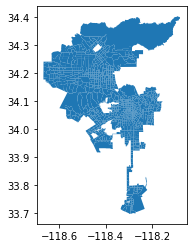

In [5]:
gdf.plot() # I'm plotting the data here to now take a look at how our data looks after dropping those two rows. As we can see, the data now includes just the census tracts within the LA city boundary.

**Step 2:**: I will now drop the columns that I do not wish to keep. First I will make a list of all of the columns to see which ones I do not want to keep, and then I will make another list of just hte columns I do wish to keep and run the code to keep just those columns. 

In [6]:
columns_to_keep = ['geoid',        # These are the columns I am deciding to keep
    'name',
    'B01001001',
    'B01001002',
    'B01001003',
    'B01001004',
    'B01001005',
    'B01001006',
    'B01001007',
    'B01001008',
    'B01001009',
    'B01001010',
    'B01001011',
    'B01001012',
    'B01001013',
    'B01001014',
    'B01001015',
    'B01001016',
    'B01001017',
    'B01001018',
    'B01001019',
    'B01001020',
    'B01001021',
    'B01001022',
    'B01001023',
    'B01001024',
    'B01001025',
    'B01001026',
    'B01001027',
    'B01001028',
    'B01001029',
    'B01001030',
    'B01001031',
    'B01001032',
    'B01001033',
    'B01001034',
    'B01001035',
    'B01001036',
    'B01001037',
    'B01001038',
    'B01001039',
    'B01001040',
    'B01001041',
    'B01001042',
    'B01001043',
    'B01001044',
    'B01001045',
    'B01001046',
    'B01001047',
    'B01001048',
    'B01001049',
    'geometry']

In [7]:
gdf = gdf[columns_to_keep] # now I am redefining the gdf with the columns I decided to keep above 

**Step 3**: Now I am going to rename my columns.

In [9]:
gdf.columns = ['geoid',        
    'name',
    'Total',
    'Male',
    'M - Under 5 years',
    'M - 5 to 9 years',
    'M - 10 to 14 years',
    'M - 15 to 17 years',
    'M - 18 and 19 years',
    'M - 20 years',
    'M - 21 years',
    'M - 22 to 24 years',
    'M - 25 to 29 years',
    'M - 30 to 34 years',
    'M - 35 to 39 years',
    'M - 40 to 44 years',
    'M - 45 to 49 years',
    'M - 50 to 54 years',
    'M - 55 to 59 years',
    'M - 60 and 61 years',
    'M - 62 to 64 years',
    'M - 65 and 66 years',
    'M - 67 to 69 years',
    'M - 70 to 74 years',
    'M - 75 to 79 years',
    'M - 80 to 84 years',
    'M - 85 years and over',
    'Female',
    'F - Under 5 years',
    'F - 5 to 9 years',
    'F - 10 to 14 years',
    'F - 15 to 17 years',
    'F - 18 and 19 years',
    'F - 20 years',
    'F - 21 years',
    'F - 22 to 24 years',
    'F - 25 to 29 years',
    'F - 30 to 34 years',
    'F - 35 to 39 years',
    'F - 40 to 44 years',
    'F - 45 to 49 years',
    'F - 50 to 54 years',
    'F - 55 to 59 years',
    'F - 60 and 61 years',
    'F - 62 to 64 years',
    'F - 65 and 66 years',
    'F - 67 to 69 years',
    'F - 70 to 74 years',
    'F - 75 to 79 years',
    'F - 80 to 84 years',
    'F - 85 years and over',
    'geometry']

In [10]:
gdf.sample() # after I renamed the columns I just want to make sure that the columns have been renamed correctly.

,geoid,name,Total,Male,M - Under 5 years,M - 5 to 9 years,M - 10 to 14 years,M - 15 to 17 years,M - 18 and 19 years,M - 20 years,...,F - 55 to 59 years,F - 60 and 61 years,F - 62 to 64 years,F - 65 and 66 years,F - 67 to 69 years,F - 70 to 74 years,F - 75 to 79 years,F - 80 to 84 years,F - 85 years and over,geometry
26,14000US06037104404,"Census Tract 1044.04, Los Angeles, CA",3084.0,1707.0,182.0,152.0,170.0,93.0,25.0,17.0,...,96.0,6.0,53.0,29.0,17.0,52.0,24.0,29.0,6.0,"MULTIPOLYGON (((-118.43527 34.26176, -118.4336..."


**Step 4:** After renaming the columns, I realize that it might make more sense to combine some of the columns to get a better sense of how age is distributed throughout LA. So, in this step, I will combine columns into age groupings that make more sense than how they are broken up now. I will also combine Male+Female because I am not particularly interested in how the age distribution is different by sex for this project. For example, I do not need 20 year olds and 21 year olds in their own categories. Combining the ages into larger groupings will enable me to visualize the data in a way that makes more sense later on than if I were to keep the columns as they are now.

The age groupings that I want instead are: **Under 18, 18-24, 25-34, 35-44, 45-54, 55-64, 65 and above**

In [12]:
gdf['18 and under'] = gdf['M - Under 5 years'] + gdf['M - 5 to 9 years'] + gdf['M - 10 to 14 years']+ gdf['M - 15 to 17 years'] + gdf['F - Under 5 years'] + gdf['F - 5 to 9 years'] + gdf['F - 10 to 14 years'] + gdf['F - 15 to 17 years']
gdf['18-24'] = gdf['M - 18 and 19 years'] + gdf['M - 20 years'] + gdf['M - 21 years'] + gdf['M - 22 to 24 years'] + gdf['F - 18 and 19 years'] + gdf['F - 20 years'] + gdf['F - 21 years'] + gdf['F - 22 to 24 years']
gdf['25-34'] = gdf['M - 25 to 29 years'] + gdf['M - 30 to 34 years'] + gdf['F - 25 to 29 years'] + gdf['F - 30 to 34 years']
gdf['35-44'] = gdf['M - 35 to 39 years'] + gdf['M - 40 to 44 years'] + gdf['F - 35 to 39 years'] + gdf['F - 40 to 44 years']
gdf['45-54'] = gdf['M - 45 to 49 years'] + gdf['M - 50 to 54 years'] + gdf['F - 45 to 49 years'] + gdf['F - 50 to 54 years'] 
gdf['55-64'] = gdf['M - 55 to 59 years'] + gdf['M - 60 and 61 years'] + gdf['M - 62 to 64 years'] + gdf['F - 55 to 59 years'] + gdf['F - 60 and 61 years'] + gdf['F - 62 to 64 years']
gdf['65 and above'] = gdf['M - 65 and 66 years'] + gdf['M - 67 to 69 years'] + gdf['M - 70 to 74 years'] + gdf['M - 75 to 79 years'] + gdf['M - 80 to 84 years'] + gdf['M - 85 years and over'] + gdf['F - 65 and 66 years'] + gdf['F - 67 to 69 years'] + gdf['F - 70 to 74 years'] + gdf['F - 75 to 79 years'] + gdf['F - 80 to 84 years'] + gdf['F - 85 years and over']

In [14]:
gdf.sample() # here I'm checking that my new columns have been added

,geoid,name,Total,Male,M - Under 5 years,M - 5 to 9 years,M - 10 to 14 years,M - 15 to 17 years,M - 18 and 19 years,M - 20 years,...,F - 80 to 84 years,F - 85 years and over,geometry,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above
441,14000US06037191810,"Census Tract 1918.10, Los Angeles, CA",3367.0,1833.0,110.0,62.0,60.0,130.0,29.0,0.0,...,12.0,9.0,"MULTIPOLYGON (((-118.33317 34.09072, -118.3324...",600.0,454.0,707.0,675.0,535.0,176.0,220.0


**Step 5:** Now I will get rid of the columns of ages that I no longer want since I just generated new columns. 

In [15]:
new_columns_to_keep = ['geoid',        # These are the columns I am deciding to keep
    'name',
    'Total',
    '18 and under',                   
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    '55-64',
    '65 and above',
    'geometry']

In [16]:
gdf = gdf[new_columns_to_keep] # now I am redefining the gdf with the columns I decided to keep above

In [17]:
gdf.sample() # Here I can see that I have kept just the data that I wanted and have a much more manageable data frame. 

,geoid,name,Total,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above,geometry
368,14000US06037183520,"Census Tract 1835.20, Los Angeles, CA",3758.0,882.0,453.0,602.0,532.0,547.0,447.0,295.0,"MULTIPOLYGON (((-118.20733 34.11181, -118.2062..."


**Step 4**: I am now going to normalize the data so that it is easier to understand, especially for mapping excercises.

In [18]:
gdf['Percent 18 and under'] = gdf['18 and under']/gdf['Total']*100
gdf['Percent 18-24'] = gdf['18-24']/gdf['Total']*100
gdf['Percent 25-34'] = gdf['25-34']/gdf['Total']*100
gdf['Percent 35-44'] = gdf['35-44']/gdf['Total']*100
gdf['Percent 45-54'] = gdf['45-54']/gdf['Total']*100
gdf['Percent 55-64'] = gdf['55-64']/gdf['Total']*100
gdf['Percent 65 and above'] = gdf['65 and above']/gdf['Total']*100

In [19]:
gdf.sample() # here we can see that the new Percent columns have been generated

,geoid,name,Total,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above,geometry,Percent 18 and under,Percent 18-24,Percent 25-34,Percent 35-44,Percent 45-54,Percent 55-64,Percent 65 and above
868,14000US06037267800,"Census Tract 2678, Los Angeles, CA",2666.0,609.0,108.0,228.0,445.0,399.0,395.0,482.0,"MULTIPOLYGON (((-118.43973 34.03910, -118.4396...",22.843211,4.051013,8.552138,16.691673,14.966242,14.816204,18.07952


## Data Visualization
Now that I've clean up my data and have ensured its integrity, I am going to create some maps and charts.

**Step 1:** Now I am going to generate some maps to explore how age is distributed throughout the city. 


I am first going to generate two side-by-side maps to explore which census tracts contain a higher proportion of people aged 65 and above, and which census tracts contain a higher proportion of people aged 18 and under. Eventually, we can use this data to see if there are more collissions/severe injuries in these census tracts. 

Text(0.5, 1.0, 'Percent 65 and above')

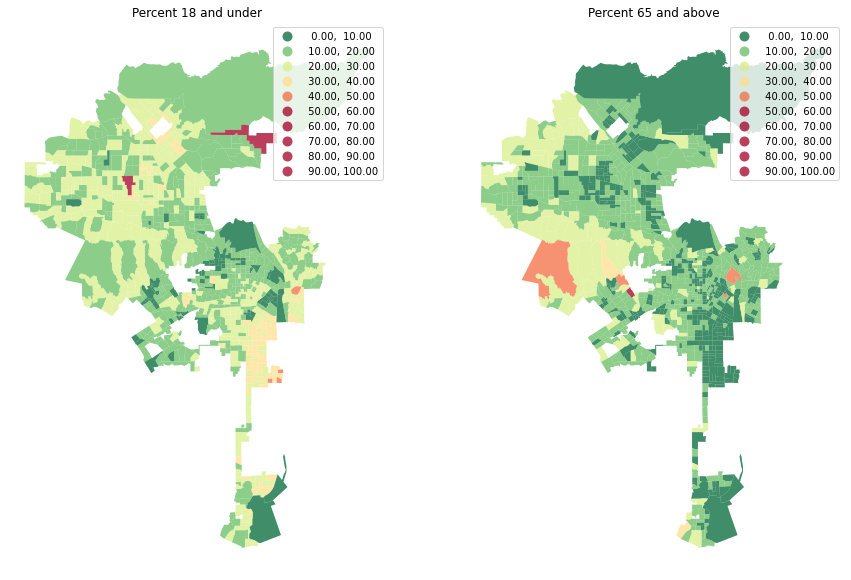

In [20]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent under 18 map on the left
gdf.plot(column='Percent 18 and under', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]}, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent 18 and under")

# percent 65 and above map on the right
gdf.plot(column='Percent 65 and above', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},  
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True)

ax2.axis("off")
ax2.set_title("Percent 65 and above")

**Step 4**: Now that I've seen which census tracts have high proportions of both young and old, I want to see a bar chart of how age is distributed throughout LA.

First I am going to find the sums all of my columns for each age group. This will allow me to portray the totals of each age grouping on the chart, to see how age is distributed throughout the city. **NOTE:** something about this line of code *gdf[gdf[['Total','18 and under', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and above']].sum(axis=0)* is making it so that my side by side maps above do not show up, so I will just take note of the totals in the markdown cell below so that the code does not interfere with my maps above.

Total: 3972867
18 and under: 822443
18-24: 407898
25-35: 718069
35-44: 569996
45-54: 522676
55-64: 439193
65 and above: 492592

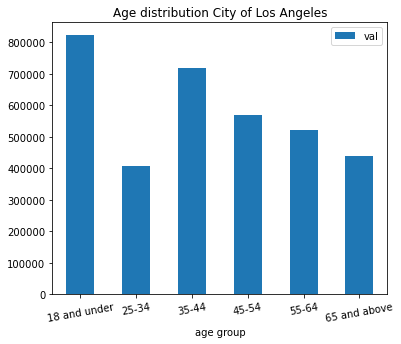

In [21]:
gdf = pd.DataFrame({'age group':['18 and under', '25-34', '35-44', '45-54', '55-64', '65 and above'], 'val':[(822443), (407898), (718069), (569996), (522676), (439193)]})
ax = gdf.plot.bar(
    figsize=(6,5),
    x='age group', y='val', title='Age distribution City of Los Angeles', rot=10)

I am now going to make a similar bar chart, but with percentages 

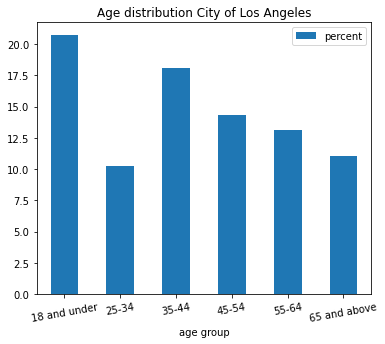

In [22]:
gdf = pd.DataFrame({'age group':['18 and under', '25-34', '35-44', '45-54', '55-64', '65 and above'], 'percent':[((822443.0/3972867)*100), ((407898.0/3972867)*100), ((718069.0/3972867)*100), ((569996.0/3972867)*100), ((522676.0/3972867)*100), ((439193.0/3972867)*100)]})
ax = gdf.plot.bar(
    figsize=(6,5),
    x='age group', y='percent', title='Age distribution City of Los Angeles', rot=10)